In [1]:
from anisotropy.core.database import Database, Structure
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn
import numpy

In [2]:
db = Database("anisotropy", "woPrismaticLayer")
db.setup()

In [3]:
res = db.search([Structure.type == "simple", Structure.direction == str([1.0, 0.0, 0.0])])
df = DataFrame(res)

In [4]:
df_numeric = df[[
    col for col in df.columns 
        if not isinstance(df[col][0], str) 
            and not isinstance(df[col][0], numpy.bool_)
            and not isinstance(df[col][0], dict)
            and not isinstance(df[col][0], list)
            and not df[col][0] is None
            and not col[-3: ] == "_id"
]]

<AxesSubplot:>

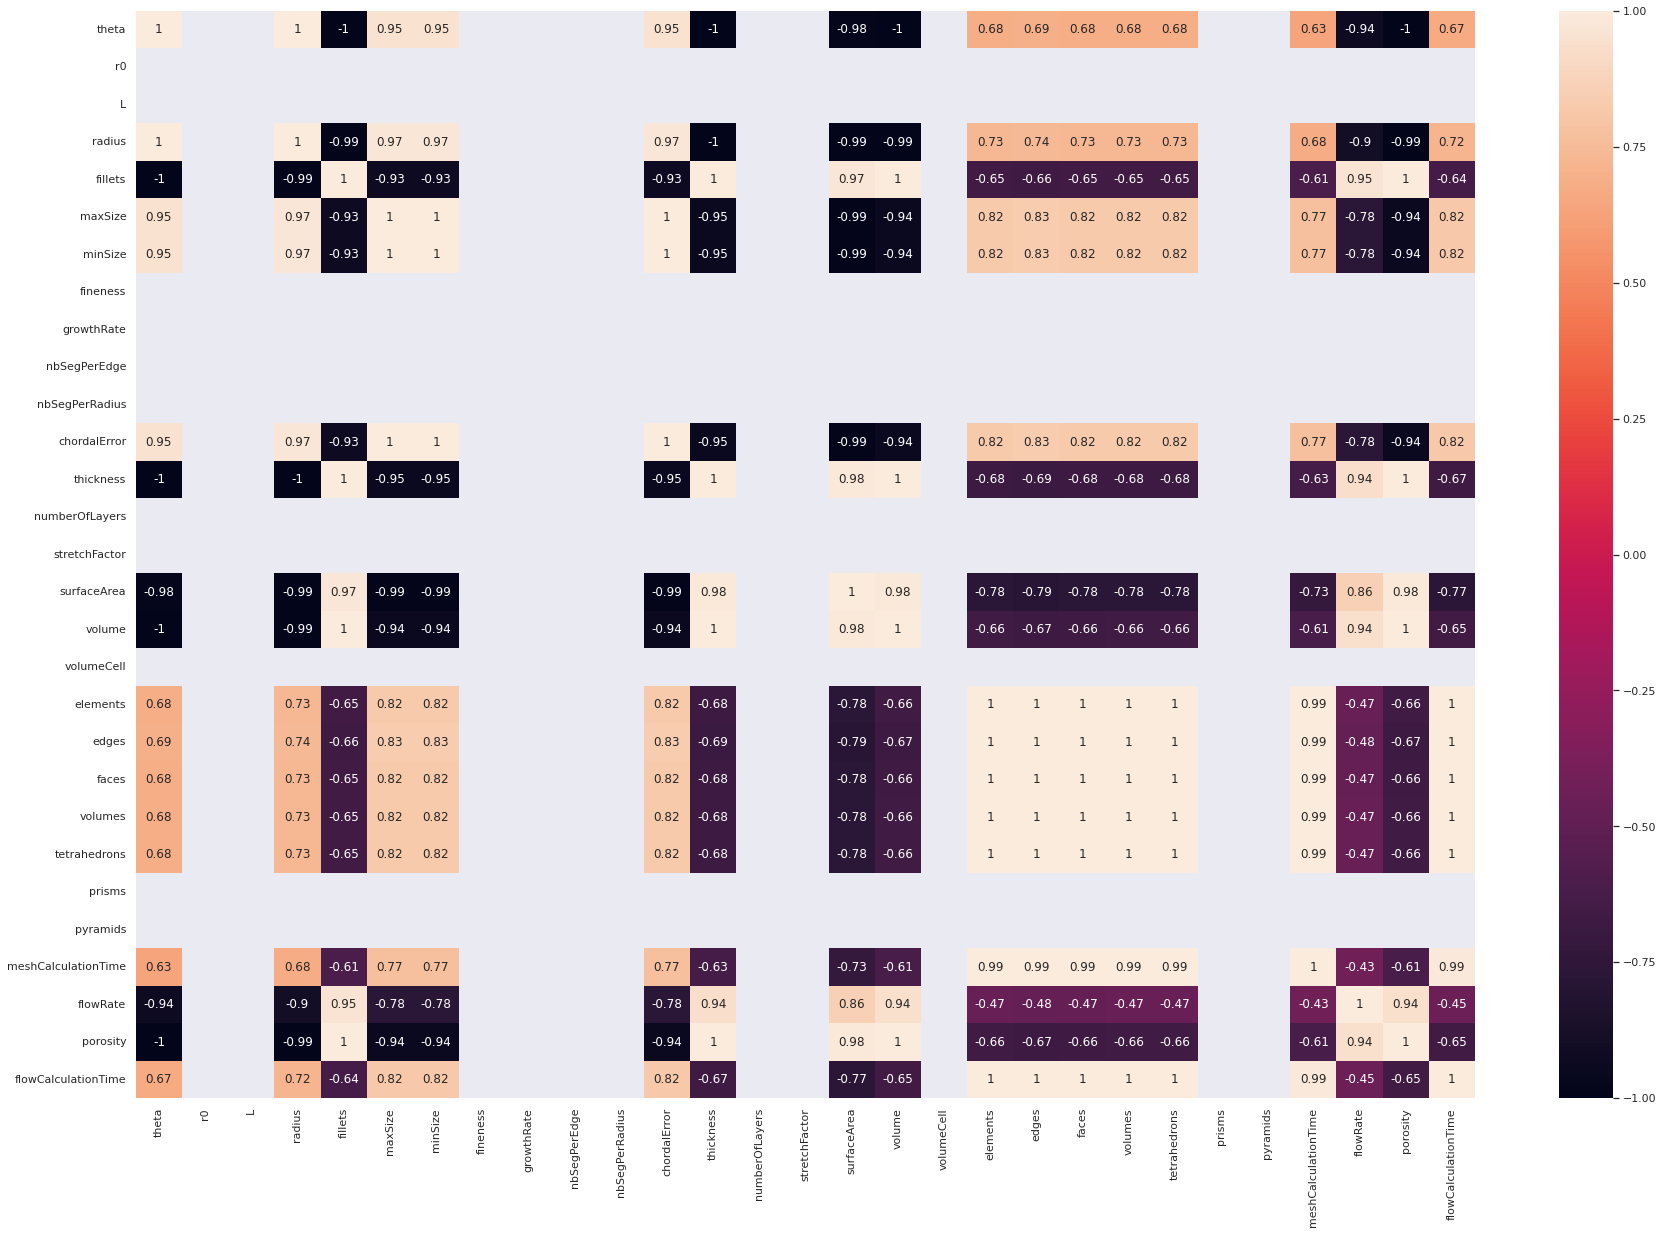

In [5]:
seaborn.set(rc = { "figure.figsize": (30, 20) })
seaborn.heatmap(df_numeric.corr(), annot = True)

In [6]:
x = df_numeric[["theta", "r0", "L", "radius"]] #.drop(columns = ["flowRate"])
y = df_numeric["flowRate"]

In [7]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(xtr)

In [9]:
from sklearn.tree import DecisionTreeRegressor
neigh = DecisionTreeRegressor(random_state = 500)
neigh.fit(x_scaled, ytr)

DecisionTreeRegressor(random_state=500)

In [10]:
from sklearn.metrics import mean_absolute_error
xte_scaled = scaler.transform(xte)
y_pred = neigh.predict(xte_scaled)
mean_absolute_error(yte, y_pred)

2.664398739090909e-15

In [11]:
#df_numeric[["theta", "r0", "L", "radius", "flowRate", "volumeCell", "volume"]]

In [12]:
test_df = DataFrame([{
    "theta": 0.29,
    "r0": 1.,
    "L": 2.,
    "radius": 1. / (1. - 0.29)
}]); test_df

,theta,r0,L,radius
0,0.29,1.0,2.0,1.408451


In [13]:
neigh.predict(scaler.transform(test_df))

array([4.53058768e-15])